### Load and Modify Configuration File

In [1]:
from configs.config_loader import load_config
config = load_config('configs/default.yaml')

version : default
seed : 1
y0 : 0.01
T : 8
N_col : 1024
N_hidden : 2
N_neurons : 20
activation : swish
N_epochs : 10000
learning_rate : 0.001
decay_rate : 1.0
freq_log : 100
freq_print : 1000
keys_print : ['loss']
freq_save : 100
regularization : reg_derivative_unstable_fp
reg_coeff : 1
reg_decay : 1
reg_epochs : 1


### Initialize Physics-Informed Neural Network

In [2]:
from model.neural_net import PhysicsInformedNN
PINN = PhysicsInformedNN(config, verbose=True)

C:\Users\mbabic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "nested_PINN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

*** PINN build & initialized ***


### Train Physics-Informed Neural Network

In [3]:
training_log = PINN.train()

Training started...
    0/10000 | loss: 2.92e-01
 1000/10000 | loss: 1.10e-02
 2000/10000 | loss: 5.76e-03
 3000/10000 | loss: 4.92e-03
 4000/10000 | loss: 3.42e-03
 5000/10000 | loss: 1.90e-03
 6000/10000 | loss: 1.35e-03
 7000/10000 | loss: 9.85e-04
 8000/10000 | loss: 7.53e-04
 9000/10000 | loss: 2.07e-03


AttributeError: 'str' object has no attribute 'joinpath'

# Plot Section

In [5]:
from model.plots import learning_curves, toy_example_dynamics, loss_over_tcoll, plot_regularization

### Learning Curves

In [8]:
learning_curves(training_log)

NameError: name 'training_log' is not defined

### Toy Example Dynamics

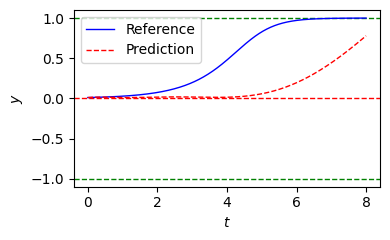

In [7]:
toy_example_dynamics(PINN)

(800, 1)
(800, 1)


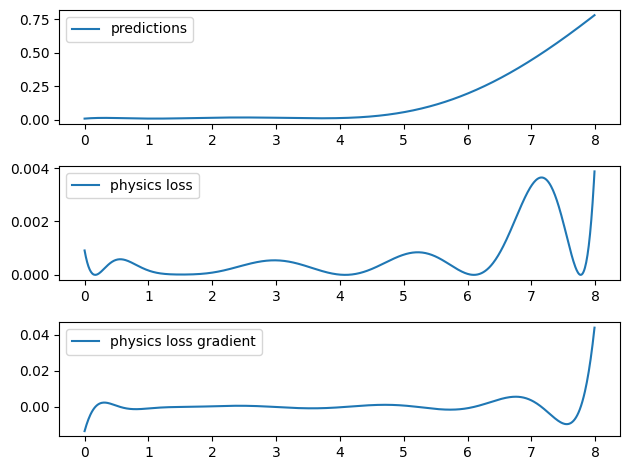

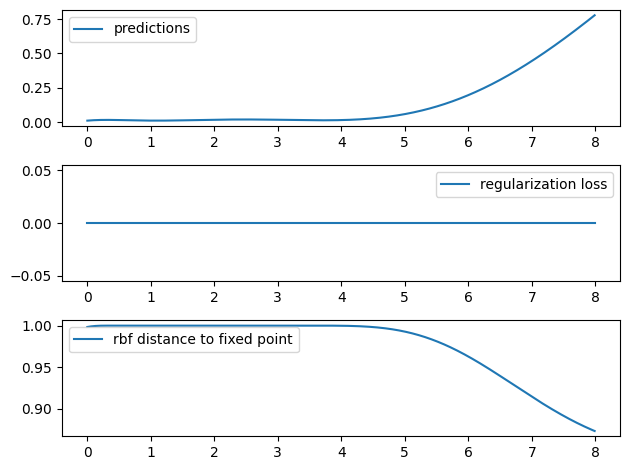

In [8]:
import tensorflow as tf

t_col = PINN.data.t_line()
pred = PINN(t_col)

print(t_col.shape)
print(pred.shape)

loss_over_tcoll(PINN)

plot_regularization(PINN)


### Training animation

In [9]:
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML



def init_fig():

    fig, ax = plt.subplots()

    #############################
    ### Initial plot comes here
    #############################

    plt.tight_layout()
    plt.close(fig)
    return fig, ax


def animate(i, *fargs):
    # get passed arguments
    ax = fargs[0]
    N_times = fargs[1]

    # print status of animation
    print(f'Processed: {i/N_times*100:.0f}%', end='\r')

    # clear axis
    ax.clear()

    #############################
    ### load model weights & make predictions
    #############################
    flag = i * config['freq_save']
    PINN.load_weights(PINN.log_path.joinpath(f'model_weights/weights_{flag}.pkl'))
    # get (equally-spaced) data points
    t_line = PINN.data.t_line()
    # get reference solution (analytical)
    y_true = PINN.data.reference(t_line)
    # get PINN prediction
    y_pred = PINN(t_line)

    #############################
    ### Updated plot comes here
    #############################

    # include fixed point lines
    for y_fix in [-1, 1]:
        ax.axhline(y_fix, lw=1, ls='--', c='green')
    ax.axhline(0, lw=1, ls='--', c='red')

    # make plots
    ax.plot(t_line, y_true, c='blue', lw=1, label='Reference')
    ax.plot(t_line, y_pred, c='red', lw=1, ls='--', label='Prediction')

    # Axis appearance
    ax.legend()
    ax.set_ylabel(r'$y$')
    ax.set_xlabel(r'$t$')


    plt.tight_layout()


# should equal the number of saved weights files
N_frames = int(config["N_epochs"] / config["freq_save"])

(fig, ax) = init_fig()
ani = FuncAnimation(fig, animate, frames=N_frames, fargs=(ax, N_frames))
HTML(ani.to_jshtml())

<Figure size 640x480 with 0 Axes>